In [1]:
#!/usr/bin/env python3.9
# -*- coding: utf-8 -*-

"""
Author: Letícia Tavares
Date: 2024-08-06
Version: 1.0.0

Description:
    This script trains and evaluates a neural network model for musical genre classification. 
    It loads and preprocesses data, defines a neural network with specific hyperparameters, 
    and trains the model. The script then evaluates the model's performance through accuracy metrics, 
    learning curves, and confusion matrix. It also generates a classification report and assesses feature 
    importance using permutation importance. Results are saved and visualized through various plots.
"""

# Standard library imports
import ast  # Abstract Syntax Trees

# Third-party library imports
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization
from loguru import logger  # Logging
from sklearn.model_selection import train_test_split, learning_curve  # Model selection and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Performance metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.inspection import permutation_importance  # Model inspection
import tensorflow as tf  # Deep learning framework
from scikeras.wrappers import KerasClassifier  # Scikit-learn wrapper for Keras
from tensorflow.keras.utils import to_categorical  # Utilities for categorical data

# Local application/library specific imports
import functions.analysis_functions as analysis_functions  # Custom functions


In [2]:
folder_input = "02_Output_Kfold_Models"

## Data

In [3]:
# Load data
logger.info("Loading data...")
df, all_genres, br_genres = analysis_functions.get_data(folder="")

# Load feature group model for artist
logger.info("Loading feature group model for artist...")
feats_group_model = analysis_functions.dict_feature_group()
feats_group_model_art = analysis_functions.dict_feature_group_art()

2024-08-06 15:54:57.196 | INFO     | __main__:<module>:2 - Loading data...
2024-08-06 15:55:01.222 | INFO     | __main__:<module>:6 - Loading feature group model for artist...


## Best Model

In [6]:
nn_result_models = pd.read_csv(f"{folder_input}/neural_network_results_F1_br_genres_more_feats.csv")
nn_result_models = nn_result_models[nn_result_models.feature_group == "combined + audio"].reset_index(drop = True)
combined_audio = [feats for k, v in feats_group_model.items() for feats in v]

params = {"dense_sizes": ast.literal_eval(nn_result_models["dense_sizes"][0]),
        "epochs": nn_result_models["epochs"][0],
        "batch_size": nn_result_models["batch_size"][0],
        "dropout_rate": nn_result_models["dropout_rate"][0]}

Epoch 1/100
375/375 [==============================] - 1s 1ms/step - loss: 0.6648 - accuracy: 0.4314
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.5528
Epoch 3/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.5751
Epoch 4/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.5852
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.5951
Epoch 6/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.5993
Epoch 7/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.5967
Epoch 8/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.6006
Epoch 9/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.5982
Epoch 10/100
375/375 [==============================] - 1s 1ms/step - loss: 0.3830 - accura

INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpgzff2vno\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpgzff2vno\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzi9uaped\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzi9uaped\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpe4kbcsgn\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpe4kbcsgn\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_mc5lvnh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_mc5lvnh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfjlgsdmi\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfjlgsdmi\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp2me_fa82\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp2me_fa82\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcvj19fqb\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcvj19fqb\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp1gvv62em\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp1gvv62em\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpl1kzg4rl\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpl1kzg4rl\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_8r63csp\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_8r63csp\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfzvm31qv\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfzvm31qv\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp53re3669\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp53re3669\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3wp_z_t9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3wp_z_t9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbxiog9vo\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbxiog9vo\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpqvpysoo5\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpqvpysoo5\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpgli9xfup\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpgli9xfup\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3krd9eye\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3krd9eye\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpflrmmgwh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpflrmmgwh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbc0xee3p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbc0xee3p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcx4rzt_k\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcx4rzt_k\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp6bnn6kl9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp6bnn6kl9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpj26ulnaz\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpj26ulnaz\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmph6b5_yiz\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmph6b5_yiz\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcurk0p86\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpcurk0p86\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfffzh2j9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfffzh2j9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpdn7niatq\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpdn7niatq\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpaeg7is8g\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpaeg7is8g\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpoziv5qa4\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpoziv5qa4\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3cg43cwh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp3cg43cwh\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp8l1tnm9p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp8l1tnm9p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp7v8rb0k2\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp7v8rb0k2\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp2u8hgszy\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp2u8hgszy\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpiz1f8qal\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpiz1f8qal\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpyaixlcmw\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpyaixlcmw\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpyz4u817p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpyz4u817p\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzmli4qzo\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzmli4qzo\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbz9x4sx9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpbz9x4sx9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpavnk100o\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpavnk100o\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpt1739vpi\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpt1739vpi\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpxldiubmu\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpxldiubmu\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfx0cg_1w\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpfx0cg_1w\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpy2aq0wrn\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpy2aq0wrn\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp82cux1_9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp82cux1_9\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpvzmzboxu\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpvzmzboxu\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp4ex6xlhx\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp4ex6xlhx\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmppbpew3wy\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmppbpew3wy\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_x_o_gtd\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_x_o_gtd\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp5gw5ciws\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp5gw5ciws\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_0jggqao\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmp_0jggqao\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzwg6znsb\assets


INFO:tensorflow:Assets written to: C:\Users\letic\AppData\Local\Temp\tmpzwg6znsb\assets


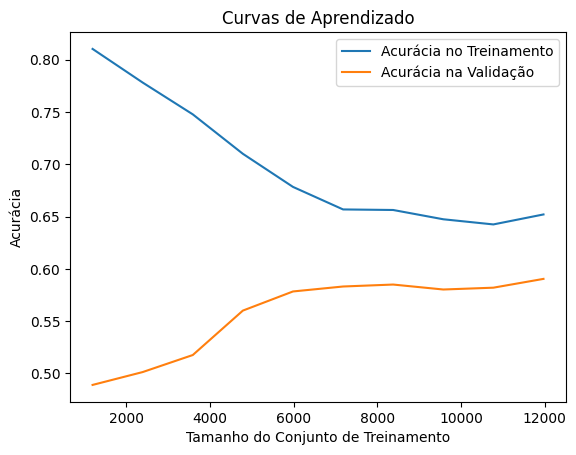

In [31]:
# Função para criar o modelo
def create_nn_model(dense_sizes=(64, 64, 32), dropout_rate=0.2, input_shape=None, output_shape=None):
    inp = tf.keras.layers.Input(shape=(input_shape,))
    
    # Dense layers with L2 regularization
    layer = inp
    for size in dense_sizes:
        layer = tf.keras.layers.Dense(size, activation="selu", kernel_initializer="lecun_normal", kernel_regularizer=tf.keras.regularizers.l2(0.001))(layer)
        layer = tf.keras.layers.AlphaDropout(dropout_rate)(layer)
    
    # Output layer
    out = tf.keras.layers.Dense(output_shape, activation="sigmoid")(layer)
    
    # Create the model
    model = tf.keras.models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Filtrar e preparar os dados
filtered_df = df.loc[df[br_genres].sum(axis=1) == 1].reset_index(drop=True)

# Split the data into training and test sets
X = filtered_df[combined_audio]
y = filtered_df[br_genres]
y = y.idxmax(axis=1)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_test_single_dim = np.argmax(y_test, axis=1)

# Treinar o modelo
modelo = KerasClassifier(
    model=create_nn_model,
    dense_sizes = params["dense_sizes"],
    dropout_rate = params["dropout_rate"],
    input_shape = X.shape[1],  # Substitua pelo tamanho real do input
    output_shape = y.shape[1],  # Número de classes
    epochs = params["epochs"],
    batch_size = params["batch_size"],  # Ajuste o batch_size conforme necessário
)

modelo.fit(X_train_scaled, y_train)

# Previsões
y_train_pred = modelo.predict(X_train_scaled)
y_test_pred = modelo.predict(X_test_scaled)

# Converta as previsões e labels de volta para rótulos
y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Acurácia
train_accuracy = accuracy_score(y_train_labels, y_train_pred)
test_accuracy = accuracy_score(y_test_labels, y_test_pred)

print(f'Acurácia no treinamento: {train_accuracy}')
print(f'Acurácia no teste: {test_accuracy}')

# Curvas de aprendizado
X_scaled = scaler.fit_transform(X)  # Padronize todo o conjunto de dados
train_sizes, train_scores, test_scores = learning_curve(modelo, X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)


class_names = label_encoder.classes_

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia no Treinamento')
plt.plot(train_sizes, test_scores_mean, label='Acurácia na Validação')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()

In [ ]:
# Calculate the correlation matrix
logger.info("Calculating the correlation matrix...")
corr_matrix = X.corr()
file_name = f"neural_network_best_corr_matrix.csv"
corr_matrix.to_csv(file_name)
logger.success(f"Correlation Matrix saved to {file_name}")

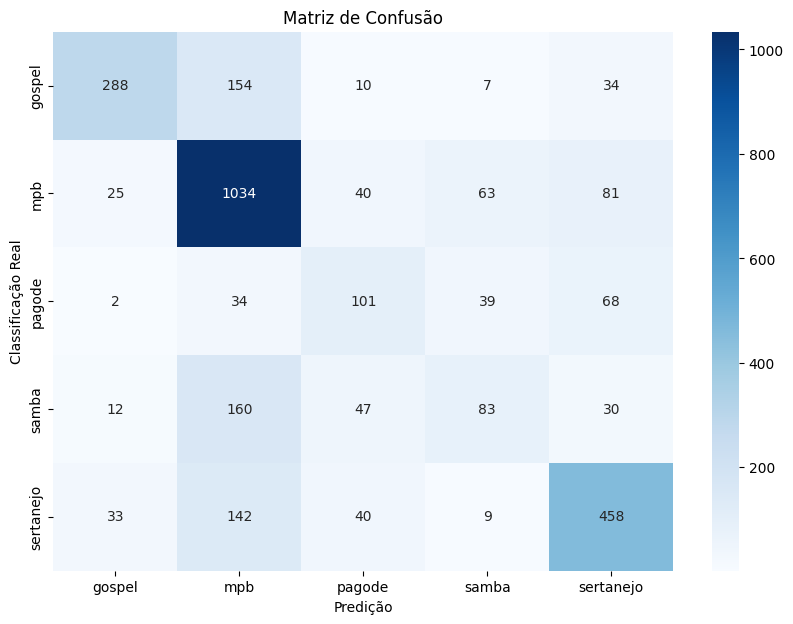

In [ ]:

# Generate the confusion matrix
logger.info("Generating the confusion matrix...")
conf_matrix = confusion_matrix(y_test_single_dim, y_test_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
file_name = f"neural_network_best_conf_matrix.csv"
df_conf_matrix.to_csv(file_name)
logger.success(f"Confusion Matrix saved to {file_name}")

df_conf_matrix.set_index(df_conf_matrix.columns[0], inplace=True)

# Plotando a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(df_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Classificação Real')
plt.title('Matriz de Confusão')
plt.show()

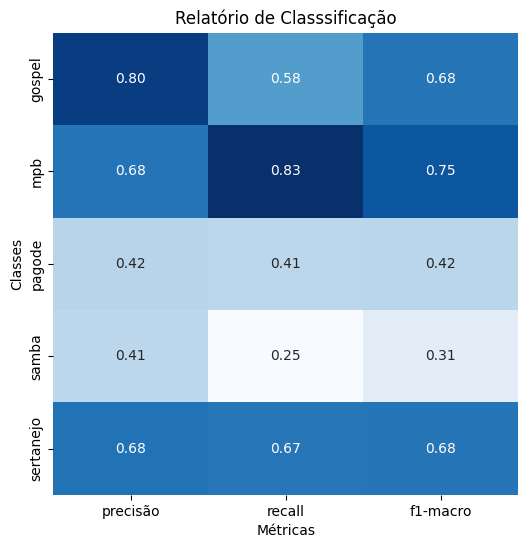

In [ ]:
report_dict = classification_report(y_test_single_dim, y_test_pred, target_names=class_names, output_dict=True, zero_division=1)
df_report = pd.DataFrame(report_dict).transpose()
file_name = f"neural_network_classification_report.csv"
df_report.to_csv(file_name)

df_report.set_index(df_report.columns[0], inplace=True)
df_report = df_report.rename({'precision':'precisão', 'f1-score':'f1-macro'}, axis=1)

# Plotar o DataFrame usando seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(df_report.iloc[:-3, :-1], annot=True, cmap="Blues", cbar=False, fmt=".2f")
plt.title('Relatório de Classsificação')
plt.xlabel('Métricas')
plt.ylabel('Classes')
plt.show()


In [ ]:
# modelo.save('neural_network_best_model.h5')

1497/1497 [==============================] - 1s 906us/step
loudness: 0.08884435537742152
valence: 0.03507014028056114
acousticness: 0.02184368737474953
energy: 0.018637274549098203
duration_ms: 0.014562458249833043
blank_line_ratio: 0.011222444889779571
danceability: 0.010821643286573156
liveness: 0.010220440881763526
speechiness: 0.010086840347361403
syllables_per_word: 0.008817635270541113
emotions_sadness: 0.008283233132932555
emotions_affection: 0.007348029392117583
avg_token_length: 0.006078824315297315
unique_line_count: 0.00567802271209088
instrumentalness: 0.005410821643286612
syllables_per_line: 0.005143620574482343
emotions_glory: 0.005143620574482322
uncommon_words_ratio: 0.00447561790247164
primary_regressive_cognition: 0.004275217100868445
lines_per_minute: 0.004141616566466322
afinn_score: 0.004074816299265227
you: 0.003740814963259886
words_per_minute: 0.003473613894455596
token_count: 0.0032732130928524008
syllable_variation: 0.002672010688042792
digits: 0.0026720106880

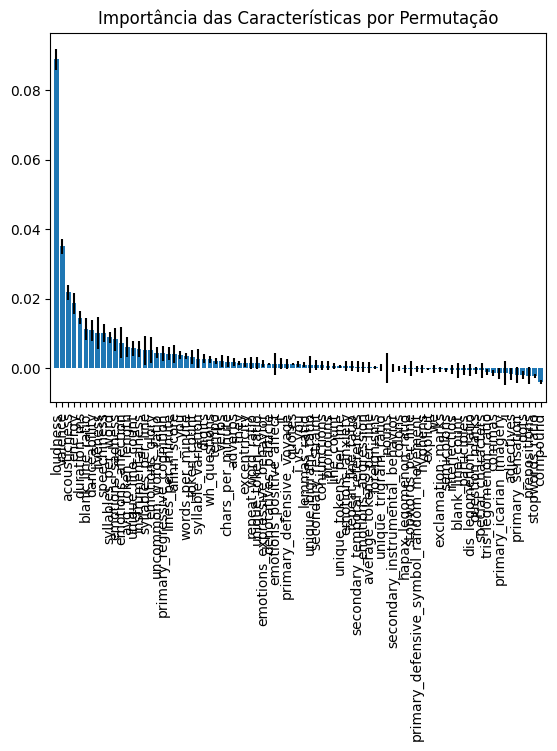

In [65]:
# Obtenha a importância da permutação
results = permutation_importance(modelo, X_test_scaled, y_test, scoring='accuracy')

# Obtenha a média e o desvio padrão das importâncias
importances = results.importances_mean
std = results.importances_std

# Ordene as características por importância
indices = np.argsort(importances)[::-1]

for idx in indices:
    print(f'{X.columns[idx]}: {importances[idx]}')

# Plotar a importância das características
plt.figure()
plt.title("Importância das Características por Permutação")
plt.bar(range(X_test.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

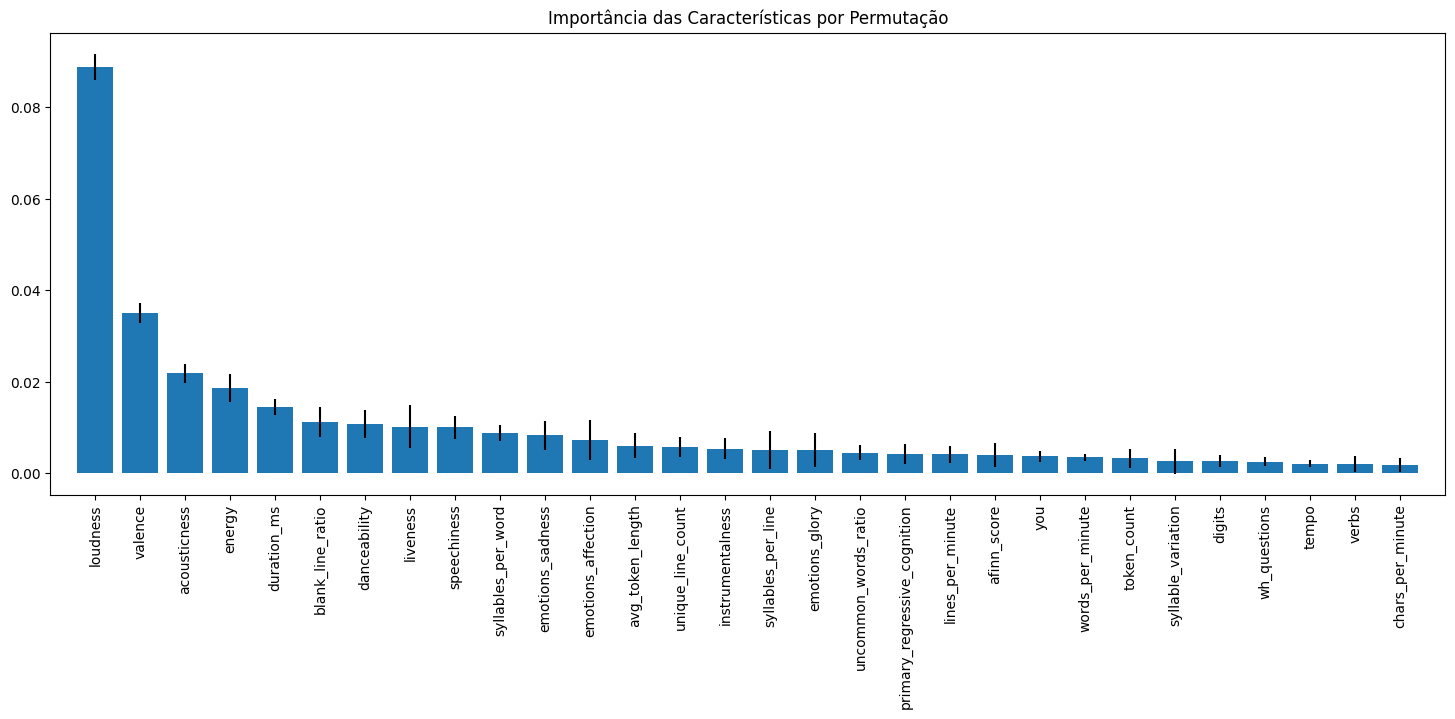

In [76]:
top_n = 30
top_indices = indices[:top_n]

# Ajustar os dados para as 20 principais variáveis
top_importances = importances[top_indices]
top_std = std[top_indices]
top_feature_names = X.columns[top_indices]

# Plotar
plt.figure(figsize=(18, 6))
plt.title("Importância dos Atributos por Permutação")
plt.bar(range(top_n), top_importances, yerr=top_std, align="center")
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.xlim([-1, top_n])
plt.show()